In [18]:
!pip install tensorflow

In [19]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [20]:
x_train= x_train/255
x_test = x_test/255

In [24]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)

In [26]:
y_test = to_categorical(y_test, num_classes = 10)

In [28]:
y_train.shape

(60000, 10)

In [30]:
import matplotlib.pyplot as plt

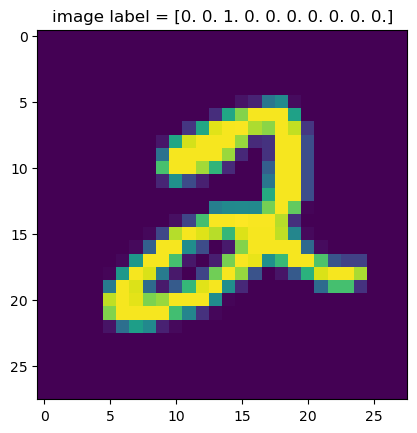

In [32]:
plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")
plt.show()

In [34]:
import numpy as np
np.unique(y_train)

array([0., 1.])

In [50]:
from tensorflow.keras.layers import Dense , Flatten , Input #flatten is used to convert a 2D matrix into single-line matrix,dense is udes with full conected neural-network
from tensorflow.keras.models import Sequential #to go with every layer in a sequence
from tensorflow.keras.utils import to_categorical #

In [52]:
model = Sequential([
    Input(shape = (28,28)), #input layer neurons 784
    Flatten(),
    Dense(5, activation =  'relu'), #hidden layer 5 neurons, activation function helps to perform non-linearity in data,relu helps to learn complex patterns
    Dense(10, activation = 'softmax') #output layer is 10 neuron, softmax is used as it is a multilevel classification
])

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         3,925 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,985 (15.57 KB)

 Trainable params: 3,985 (15.57 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
# adam it automatically adjusts the learning rate during training.
# categorical crossentropy is used when you have a multiclass classification


In [58]:
model.fit(x_train, y_train, epochs = 5, batch_size = 32, verbose = 2)

Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.7069 - loss: 0.9226
Epoch 2/5
1875/1875 - 6s - 3ms/step - accuracy: 0.8446 - loss: 0.5494
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8626 - loss: 0.4904
Epoch 4/5
1875/1875 - 6s - 3ms/step - accuracy: 0.8707 - loss: 0.4586
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8756 - loss: 0.4399


In [60]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8602 - loss: 0.4938


[0.4382898509502411, 0.8777999877929688]

In [71]:
model.save('my_model.keras')

In [73]:
model.get_weights()

[array([[-0.00312151, -0.03575895, -0.03731936,  0.03203645, -0.01265641],
        [ 0.05471188, -0.00018378, -0.05508617,  0.03020186, -0.05263016],
        [ 0.01056863,  0.01476733,  0.02311042,  0.07282168, -0.06870744],
        ...,
        [-0.00640073,  0.03925189, -0.06373993,  0.02678595, -0.07264598],
        [ 0.07155454,  0.00286715,  0.07985586,  0.07167363,  0.06259839],
        [-0.0641681 ,  0.04241858, -0.0153422 ,  0.00192761,  0.07138595]],
       dtype=float32),
 array([ 0.8555438 ,  0.41577587,  1.0052928 ,  0.31094795, -0.43688002],
       dtype=float32),
 array([[-0.2799601 , -0.18062294, -0.3939785 , -1.1154709 ,  1.1721298 ,
         -0.91545606,  0.26534104,  0.5266343 , -0.92054033,  0.493898  ],
        [-0.5945859 ,  0.1852531 , -1.0979443 , -0.74431497,  0.29310483,
          0.68638015,  0.16161849, -1.5366565 ,  0.51662976, -0.10720991],
        [ 1.2065427 ,  0.6102598 , -0.33122405, -0.52314   , -0.2883323 ,
         -0.14601324,  0.05874721, -0.493020